# 5.1 决策树模型的基本原理

# 5.1.3 决策树模型的代码实现

决策树模型既可以做分类分析（即预测分类变量值），也可以做回归分析（即预测连续变量值），分别对应的模型为分类决策树模型（DecisionTreeClassifier）及回归决策树模型（DecisionTreeRegressor）。

**1.分类决策树模型（DecisionTreeClassifier）**

In [1]:
from sklearn.tree import DecisionTreeClassifier
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y = [1, 0, 0, 1, 1]

model = DecisionTreeClassifier(random_state=0)
model.fit(X, y)

print(model.predict([[5, 5]]))

[0]


如果要同时预测多个数据，则可以写成如下形式：

In [2]:
print(model.predict([[5, 5], [7, 7], [9, 9]]))

[0 0 1]


**补充知识点：决策树可视化（供感兴趣的读者参考）**

通过graphviz插件进行决策树可视化，graphviz插件的使用教程可以查看该文档:https://shimo.im/docs/Dcgw8H6WxgWrc8hq/ 

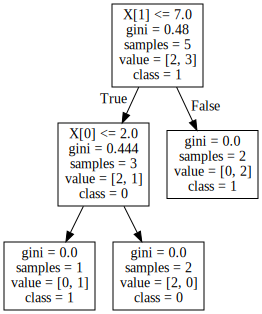

In [3]:
# 1.如果不用显示中文，那么通过如下代码即可。安装graphviz稍微有些麻烦，可以参考上面的参考链接。
from sklearn.tree import export_graphviz
import graphviz

import os  # 以下两行是环境变量配置，运行一次即可，相关知识点可以参考5.2.3节
os.environ['PATH'] = os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'

dot_data = export_graphviz(model, out_file=None, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph  # 通过graph.render('决策树可视化')可在代码所在文件夹生成决策树可视化PDF文件

**补充知识点：random_state参数的作用解释**

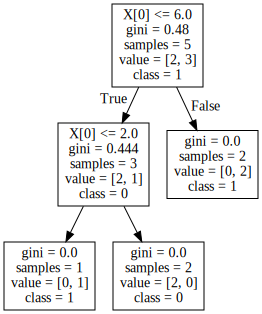

In [4]:
from sklearn.tree import DecisionTreeClassifier
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y = [1, 0, 0, 1, 1]

model = DecisionTreeClassifier()  # 不设置random_state参数
model.fit(X, y)

# 生成可视化结果
dot_data = export_graphviz(model, out_file=None, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph

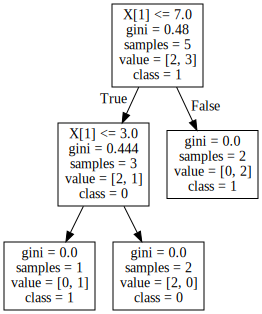

In [5]:
from sklearn.tree import DecisionTreeClassifier
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y = [1, 0, 0, 1, 1]

model = DecisionTreeClassifier()  # 不设置random_state参数
model.fit(X, y)

# 生成可视化结果
dot_data = export_graphviz(model, out_file=None, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph

可以看到它们的节点划分方式是不同的，这样会导致同样的数据的预测结果有所不同，例如数据[7, 7]在左边的决策树中会被预测为类别0，而在右边的决策树中会被预测为类别1。

此时有的读者就会有疑问了，为什么模型训练后会产生两颗不同的树呢，哪棵树是正确的呢？其实两颗树都是正确的，出现这种情况的原因，是因为根据“X[1]<=7”或者“X[0]<=6”进行节点划分时产生的基尼系数下降是一样的（都是0.48 - (0.6*0.444 + 0.4*0) = 0.2136），所以无论以哪种形式进行节点划分都是合理的。产生这一现象的原因大程度是因为数据量较少所以容易产生不同划分方式产生的基尼系数下降是一样的情况，当数据量较大时出现该现象的几率则较小。

总的来说，对于同一个模型，不同的划分方式可能会导致最后的预测结果会有所不同，设置random_state参数（可以设置成0，也可以设置成1或123等任意数字）则能保证每次的划分方式都是一致的，使得每次运行的结果相同。这个概念对于初学者来说还是挺重要的，因为初学者往往会发现怎么每次运行同一个模型出来的结果都不一样，从而一头雾水，如果出现这种情况，那么设置一下random_state参数即可。

**2.回归决策树模型（DecisionTreeRegressor）**

In [6]:
from sklearn.tree import DecisionTreeRegressor
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y = [1, 2, 3, 4, 5]

model = DecisionTreeRegressor(max_depth=2, random_state=0)
model.fit(X, y)

print(model.predict([[9, 9]]))

[4.5]


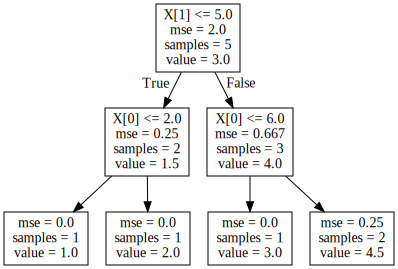

In [7]:
# 生成可视化结果
dot_data = export_graphviz(model, out_file=None)  # 回归决策树就没有class分类参数了
graph = graphviz.Source(dot_data)
graph